In [ ]:
import tensorflow as tf
import numpy as np
import cv2 as cv

from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os


## Data Loading and preprocessing for Model 

In [ ]:
#Loading the data 

data = os.listdir(r"/Users/subrat_roy/Documents/sudoku_solver/digits_jpeg" )
data_X = []     
data_y = []  
data_classes = len(data)
for i in range (0,data_classes):
    data_list = os.listdir(r"/Users/subrat_roy/Documents/sudoku_solver/digits_jpeg" +"/"+str(i))
    for j in data_list:
        pic = cv2.imread(r"/Users/subrat_roy/Documents/sudoku_solver/digits_jpeg" +"/"+str(i)+"/"+j)
        pic = cv2.resize(pic,(32,32))
        data_X.append(pic)
        data_y.append(i)

         
if len(data_X) == len(data_y) :
    print("Total Dataponits = ",len(data_X))

# Labels and images
data_X = np.array(data_X)
data_y = np.array(data_y)

In [ ]:
data_X.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)
print("Test Set Shape = ",test_X.shape)

In [ ]:
def Prep(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY) #making image grayscale
    img = cv.equalizeHist(img) #Histogram equalization to enhance contrast
    img = img/255 #normalizing
    return img


In [ ]:
train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))


In [ ]:
train_X.shape

In [ ]:
#Reshaping the images
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)


In [ ]:
train_X.shape

In [ ]:
test_X.shape

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

In [ ]:
train_y.shape

In [ ]:
test_y.shape

## Model Creation

In [ ]:
# model=models.Sequential([
#     layers.InputLayer(input_shape=(32,32,1)),
#     layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
#     layers.MaxPooling2D((2,2)),
    
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(10, activation='softmax') 
# ])

# model.compile(optimizer='adam',loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.summary()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add((Conv2D(60,(5,5),input_shape=(32, 32, 1) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Fit the model

history = model.fit(train_X, train_y,batch_size=64, epochs=30, validation_data=(valid_X, valid_y))



In [ ]:
score = model.evaluate(test_X, test_y, verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

In [ ]:
model.save('digit_recogonition_model.h5')

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## Predicting cells using saved model 

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('digit_recogonition_model.h5')


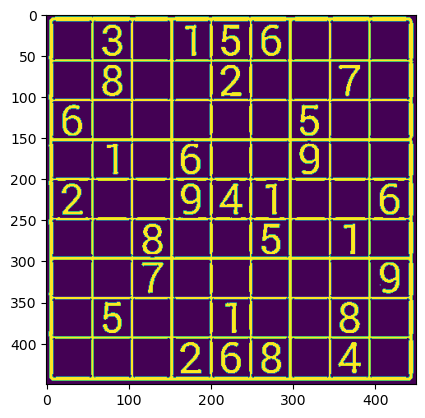

In [258]:

sudoku_a=cv.imread('/Users/subrat_roy/Documents/sudoku_solver/istockphoto-1291290878-612x612.jpg')
sudoku_a = cv.resize(sudoku_a, (450,450))

# function to greyscale, blur and change the receptive threshold of image
def preprocess(image):
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 
    blur = cv.GaussianBlur(gray, (3,3),6) 
    #blur = cv2.bilateralFilter(gray,9,75,75)
    threshold_img = cv.adaptiveThreshold(blur,255,1,1,11,2)
    return threshold_img

threshold = preprocess(sudoku_a)

#let's look at what we have got
plt.figure()
plt.imshow(threshold)
plt.show()

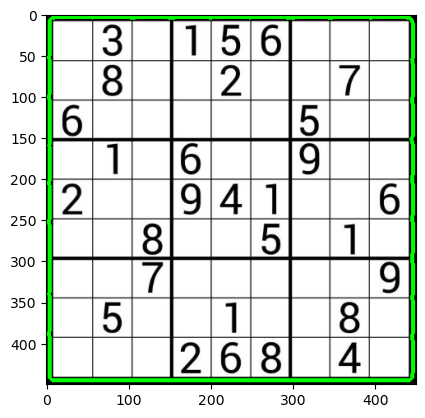

In [259]:

contour_1 = sudoku_a.copy()
# contour_2 = sudoku_a.copy()
contour, hierarchy = cv.findContours(threshold,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(contour_1, contour,-1,(0,255,0),3)


plt.figure()
plt.imshow(contour_1)
plt.show()

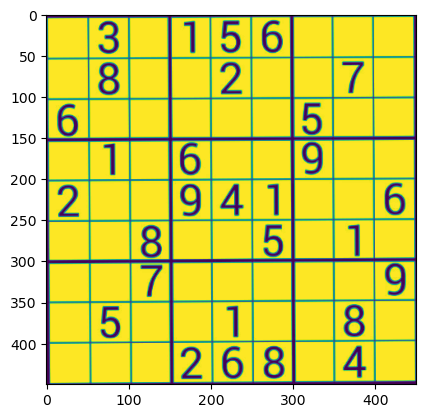

In [260]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv.contourArea(i)
        if area >50:
            peri = cv.arcLength(i, True)
            approx = cv.approxPolyDP(i , 0.02* peri, True)
            if area > max_area and len(approx) ==4:
                biggest = approx
                max_area = area
    return biggest ,max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4,1,2),dtype = np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis =1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

def splitcells(img):
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes


black_img = np.zeros((450,450,3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
    biggest = reframe(biggest)
    cv.drawContours(contour_2,biggest,-1, (0,255,0),10)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    matrix = cv.getPerspectiveTransform(pts1,pts2)  
    imagewrap = cv.warpPerspective(sudoku_a,matrix,(450,450))
    imagewrap =cv.cvtColor(imagewrap, cv.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(imagewrap)
plt.show()

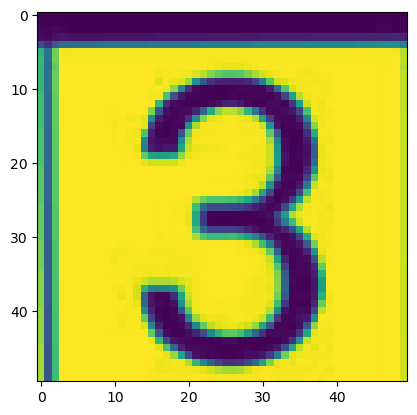

In [262]:
sudoku_cell = splitcells(imagewrap)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell[1])
plt.show()

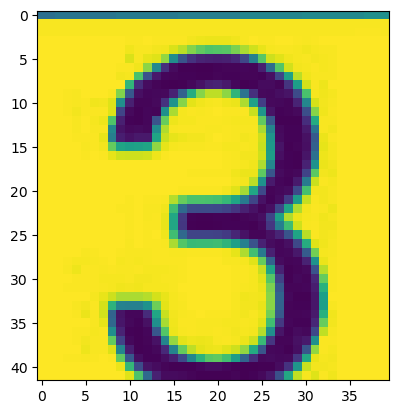

In [263]:
def CropCell(cells):
    Cells_croped = []
    for image in cells:
        
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_croped.append(img)
        
    return Cells_croped

sudoku_cell_croped= CropCell(sudoku_cell)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_croped[1])
plt.show()

In [ ]:
# # Create the directory for saving cropped cells
# os.makedirs("cropped_boxes", exist_ok=True)

# # Save the cropped cells as JPEG files
# for i, cell in enumerate(sudoku_cell_croped):
#     cell.save(f"cropped_boxes/cell_{i+1}.jpeg", "JPEG")

# print("All cropped cells have been saved as jpeg files in the 'cropped_boxes' directory.")

In [264]:
import numpy as np
import cv2 as cv

def preprocess_image(image):
    # Convert to grayscale if not already
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding
    image = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
    
    # Resize to the required input size for the model
    image = cv.resize(image, (32, 32))
    
    # Normalize the image
    image = image / 255.0
    
    # Reshape to match the input shape expected by the model
    image = image.reshape(1, 32, 32, 1)
    
    return image

def read_cells(cell, model, threshold=0.8):
    result = []
    probabilities = []
    for image in cell:
        # Preprocess the image
        img = np.asarray(image)
        img = img[4:img.shape[0] - 4, 4:img.shape[1] - 4]
        img = preprocess_image(img)
        
        # Get predictions
        predictions = model.predict(img)
        classIndex = np.argmax(predictions, axis=1)
        probabilityValue = np.amax(predictions)
        
        # Setting the values if probabilities are above the given threshold
        if probabilityValue > threshold:
            result.append(classIndex[0])
        else:
            result.append(0)
        
        probabilities.append(predictions[0])
    
    return result, probabilities

# Assuming sudoku_cell_croped and model are already defined
grid, all_probabilities = read_cells(sudoku_cell_croped, model)
grid = np.asarray(grid)

# Print the probabilities for all classes for all cells
for i, prediction in enumerate(all_probabilities):
    print(f'Cell {i+1}:')
    for class_index, probability in enumerate(prediction):
        print(f'  Class {class_index}: {probability:.6f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [265]:
grid = np.reshape(grid,(9,9))
grid

array([[0, 2, 0, 1, 5, 6, 0, 0, 0],
       [0, 9, 0, 0, 7, 0, 0, 1, 0],
       [6, 0, 0, 0, 0, 0, 6, 0, 0],
       [0, 1, 0, 6, 0, 0, 9, 0, 0],
       [7, 0, 0, 0, 4, 1, 0, 0, 0],
       [0, 0, 8, 0, 0, 5, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 9],
       [0, 5, 0, 0, 1, 0, 0, 8, 0],
       [0, 0, 0, 7, 6, 8, 0, 4, 0]])

In [243]:
def is_safe(board, row, col, num):
    # Check if the number is not repeated in the current row
    for x in range(9):
        if board[row][x] == num:
            return False
    
    # Check if the number is not repeated in the current column
    for x in range(9):
        if board[x][col] == num:
            return False
    
    # Check if the number is not repeated in the current 3x3 sub-grid
    start_row = row - row % 3
    start_col = col - col % 3
    for i in range(3):
        for j in range(3):
            if board[i + start_row][j + start_col] == num:
                return False
    
    return True

def solve_sudoku(board):
    # Find an empty location in the board
    empty = find_empty_location(board)
    if not empty:
        return True  # No empty location means the puzzle is solved
    row, col = empty
    
    # Try placing numbers from 1 to 9 in the empty location
    for num in range(1, 10):
        if is_safe(board, row, col, num):
            board[row][col] = num
            
            # Recursively attempt to solve the puzzle
            if solve_sudoku(board):
                return True
            
            # If placing num doesn't lead to a solution, backtrack
            board[row][col] = 0
    
    return False

def find_empty_location(board):
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return (i, j)
    return None

def print_board(board):
    for row in board:
        print(" ".join(str(num) for num in row))

# Example usage:
sudoku_board = grid

if solve_sudoku(sudoku_board):
    print("Solved Sudoku:")
    print_board(sudoku_board)
else:
    print("No solution exists")


Solved Sudoku:
5 3 4 6 7 8 9 1 2
6 7 2 1 9 5 3 4 8
1 9 8 3 4 2 5 6 7
8 5 9 7 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 4 8 5 6
9 6 1 5 3 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9


In [245]:
from PIL import Image, ImageDraw, ImageFont

In [247]:
ngrid = np.asarray(grid).reshape(-1)

In [252]:
def overlay_digits_on_image(original_image_path, grid, cell_size=32):
    # Load the original image
    original_image = Image.open(original_image_path)
    draw = ImageDraw.Draw(original_image)
    
    # Load a font
    try:
        font = ImageFont.truetype("arial.ttf", 50)
    except IOError:
        font = ImageFont.load_default()
    
    # Get the dimensions of the original image
    width, height = original_image.size
    
    # Calculate the size of each cell in the original image
    cell_width = width // 9
    cell_height = height // 9
    
    for i, digit in enumerate(ngrid):
        if digit != 0:
            row = i // 9
            col = i % 9
            x = col * cell_width + cell_width // 4
            y = row * cell_height + cell_height // 4
            draw.text((x, y), str(digit), fill="black", font=font)
    
    return original_image

original_image_path="/Users/subrat_roy/Documents/sudoku_solver/Correct_pred_image.png"

overlay_image = overlay_digits_on_image(original_image_path, ngrid)
overlay_image.save('solved_sudoku.png')